## 다중 클래스 분류 연습문제

### 다중 클래스 분류 작업
- (1) 데이터 준비 : iris 데이터 사용
- (2) 모델링 
- (3) 모델 저장 / 불러오기
- (4) 시각화  

In [1]:
# 다음 사항만 주의하면 됨 
# 카테고리 값 -> 원-핫 인코딩 
# 피처 수 : 4 (input_shape=(4,))
# 출력 수 : 3 (units=3)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
from sklearn.model_selection import train_test_split

# feature = iris['data']
# label = iris['target']

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                   iris.target,
                                                   test_size=0.3, 
                                                   random_state=42)

In [7]:
# 데이터 세트 확인
X_train.shape 
y_train.shape
X_test.shape
y_test.shape

(105, 4)

(105,)

(45, 4)

(45,)

In [8]:
# 피처 값 확인 : 0.1 ~ 7.9 범위의 값
np.min(X_train), np.max(X_train)

(np.float64(0.1), np.float64(7.7))

In [9]:
# 레이블 값 확인 : 0~2 범위의 값
np.min(y_train), np.max(y_train)

(np.int64(0), np.int64(2))

In [10]:
X_train_scaled = X_train/7.7
X_test_scaled = X_test/7.7

In [11]:
# 0~2 값의 레이블을 원-핫 인코딩 변환 (바이너리화) : 0 또는 1로 변환
from  keras.utils import to_categorical

y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

In [12]:
X_train.shape

(105, 4)

In [13]:
#### (2) 모델링 ####
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(3)

# 모델 설정
model = Sequential()

model.add(Dense(units=16, input_shape=(4, ), activation = "relu"))
model.add(Dense(units=3, activation="softmax"))
# 컴파일
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 모델 학습 (실행)
history = model.fit(X_train, y_train2,
                   epochs=100, batch_size=16,
                   validation_data=(X_test_scaled, y_test2))

Epoch 1/100


C:\Users\82108\anaconda3\envs\DLenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.2946 - loss: 2.5575 - val_accuracy: 0.4222 - val_loss: 1.1375
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3066 - loss: 2.1528 - val_accuracy: 0.4222 - val_loss: 1.1311
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2956 - loss: 2.1619 - val_accuracy: 0.0222 - val_loss: 1.1265
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2180 - loss: 2.0301 - val_accuracy: 0.2444 - val_loss: 1.1230
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2698 - loss: 1.7005 - val_accuracy: 0.2889 - val_loss: 1.1197
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2211 - loss: 1.6591 - val_accuracy: 0.2889 - val_loss: 1.1160
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3266 - loss: 1.5225 - val_accuracy: 0.2889 - val_loss: 1.1116
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4289 - loss: 1.4381 - val_accuracy: 0.2889 - val_loss: 1.1066
Epoc

In [16]:
# (4) 모델 평가 (결과 출력)
# acc, loss
accuracy, loss = model.evaluate(X_test_scaled, y_test2)

print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6928 - loss: 0.9439
정확도: 0.9265, 손실: 0.7111


In [19]:
# 모델 저장

model.save('./model/iris_model1.keras')
model.save('./model/iris_model2.h5')

In [20]:
from tensorflow.keras.models import load_model

# 모델 읽어오기
loaded_model = load_model('./model/iris_model1.keras')

In [21]:
y_pre_prob = loaded_model.predict(X_test_scaled, verbose=0)
y_pre_prob
y_pre_prob.shape
y_pre_prob[0]

array([[0.36667866, 0.46876895, 0.16455239],
       [0.55721223, 0.36525878, 0.07752904],
       [0.2564256 , 0.49913314, 0.24444127],
       [0.35614815, 0.4743849 , 0.16946697],
       [0.36978155, 0.47187114, 0.15834723],
       [0.5470353 , 0.37186748, 0.08109722],
       [0.39826912, 0.4552586 , 0.14647225],
       [0.31012917, 0.49866804, 0.19120283],
       [0.35561824, 0.47622597, 0.1681559 ],
       [0.3942527 , 0.45712283, 0.14862444],
       [0.31703743, 0.49231175, 0.1906508 ],
       [0.54682213, 0.3700098 , 0.08316805],
       [0.5663343 , 0.3599049 , 0.07376083],
       [0.54705137, 0.36983556, 0.08311308],
       [0.5521163 , 0.36675635, 0.08112735],
       [0.35301802, 0.4769576 , 0.17002437],
       [0.27587414, 0.5010888 , 0.2230371 ],
       [0.39284727, 0.4564588 , 0.1506939 ],
       [0.35870734, 0.470818  , 0.17047465],
       [0.28006917, 0.49988833, 0.22004256],
       [0.53662   , 0.37520084, 0.08817913],
       [0.32461616, 0.48704076, 0.18834303],
       [0.

(45, 3)

array([0.36667866, 0.46876895, 0.16455239], dtype=float32)

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

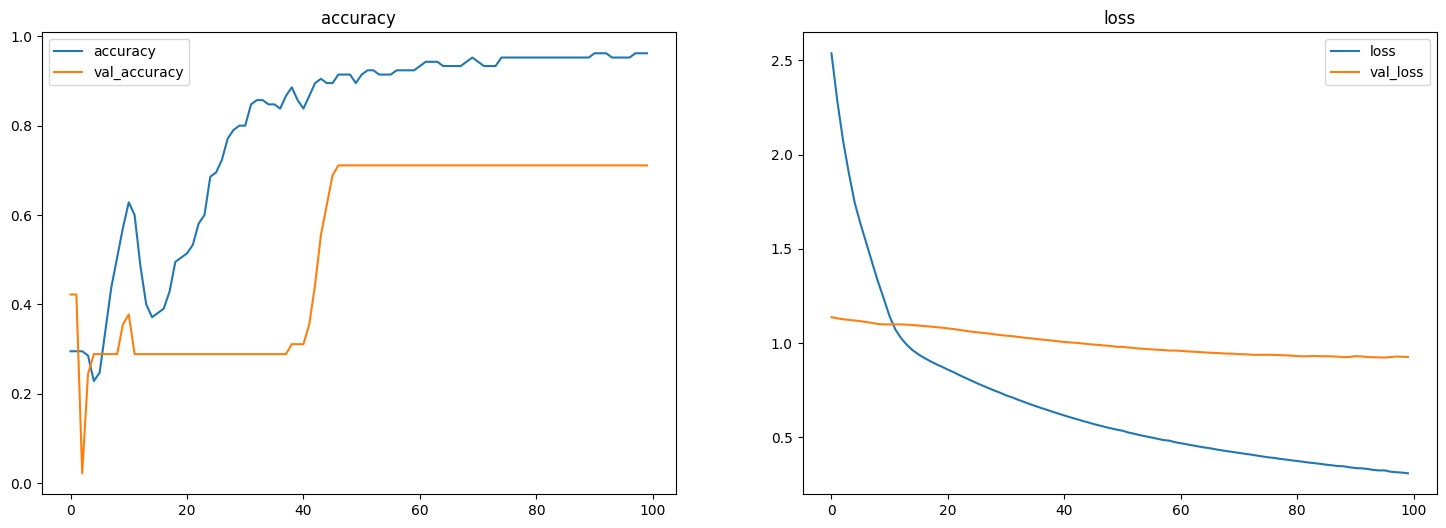

In [18]:
# 정확도 손실율 비교 그래프 생성
plt. figure(figsize=(18, 6))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title('accuracy')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title('loss')
plt.legend()

plt.show()